# Theoretical Questions

Ans1: Yes, Bagging (Bootstrap Aggregating) works for regression using models like Decision Tree Regressor. The aggregated prediction is the mean of individual predictions.

Ans2: Difference between multiple model training and single model training:-

Single model training: One model learns from the entire dataset.

Multiple model training (Ensemble): Several models learn from different subsets or variations of the data, and their predictions are combined for better accuracy and robustness.

Ans3: In Random Forest, each split in a decision tree is made by considering a random subset of features, not all. This introduces diversity among trees, reducing correlation and improving generalization.

Ans4: OOB Score is the validation accuracy computed using the data not included in the bootstrap sample for each tree. It gives an unbiased estimate of model performance without needing a separate validation set.

Ans5: Feature importance is measured by:

Mean decrease in impurity (MDI): How much a feature reduces Gini/Entropy across all trees.

Permutation importance: How performance drops when a feature’s values are randomly shuffled.

Ans6 :Draw bootstrap samples from the dataset.

Train a base classifier (like Decision Tree) on each sample.

Use majority voting to combine predictions.

Ans7: Use standard metrics like:

Accuracy, Precision, Recall, F1-Score (for classification)

Also monitor OOB score and use cross-validation.

Ans8: Similar to Bagging Classifier, but for regression.

Each regressor is trained on a bootstrap sample.

Final prediction is the average of all base regressors' outputs.

Ans9:They reduce variance, improve accuracy, and are more robust than single models, especially with noisy or small datasets.

Ans10: Main challenge of ensemble methods:
Computational cost: Training multiple models is resource-intensive.

Interpretability: Harder to explain than single models.

Overfitting risk if not carefully tuned (especially with Boosting).

Ans11: "Wisdom of the crowd": Combine predictions from multiple diverse models to get a better, more stable result than any single model.

Ans12: An ensemble of decision trees using Bagging + random feature selection. It outputs the majority class predicted by individual trees.

Ans13: Main types of ensemble techniques:

Bagging

Boosting

Stacking

Voting



Ans14: A technique where multiple models are trained and combined to solve the same task, aiming to improve overall performance.

Ans15: When interpretability is crucial.

On small datasets (risk of overfitting or unnecessary complexity).

When the base model already performs well and ensembles add little gain.

Ans16: By training on different subsets of data, Bagging reduces variance and model sensitivity to noise, preventing overfitting.

Ans17: Lower variance due to averaging.

More robust to overfitting.

Higher accuracy on test data.

Ans18: Bootstrap sampling ensures each base learner sees a different perspective of the data, promoting model diversity and reducing overfitting.

Ans19:  Real-world applications of ensemble techniques:-

Credit scoring

Fraud detection

Spam filtering

Medical diagnosis

Image recognition (e.g., Random Forest in remote sensing)



Ans20


| Feature            | Bagging                       | Boosting                      |
| ------------------ | ----------------------------- | ----------------------------- |
| Data Sampling      | Independent bootstrap samples | Sequential, focuses on errors |
| Model Training     | In parallel                   | In sequence                   |
| Error Handling     | Reduces variance              | Reduces bias                  |
| Overfitting Risk   | Less prone                    | More prone (if not tuned)     |
| Example Algorithms | Random Forest                 | AdaBoost, Gradient Boosting   |


# Practical Questions



In [ ]:
#Ans21
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

In [ ]:
#Ans22
from sklearn.datasets import load_boston
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X, y = load_boston(return_X_y=True)  # Use sklearn.datasets.fetch_openml if deprecated
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))

In [2]:
#Ans23
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

data = load_breast_cancer()
X, y = data.data, data.target

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

importances = model.feature_importances_
for name, score in zip(data.feature_names, importances):
    print(f"{name}: {score:.4f}")


mean radius: 0.0348
mean texture: 0.0152
mean perimeter: 0.0680
mean area: 0.0605
mean smoothness: 0.0080
mean compactness: 0.0116
mean concavity: 0.0669
mean concave points: 0.1070
mean symmetry: 0.0034
mean fractal dimension: 0.0026
radius error: 0.0143
texture error: 0.0037
perimeter error: 0.0101
area error: 0.0296
smoothness error: 0.0047
compactness error: 0.0056
concavity error: 0.0058
concave points error: 0.0038
symmetry error: 0.0035
fractal dimension error: 0.0059
worst radius: 0.0828
worst texture: 0.0175
worst perimeter: 0.0808
worst area: 0.1394
worst smoothness: 0.0122
worst compactness: 0.0199
worst concavity: 0.0373
worst concave points: 0.1322
worst symmetry: 0.0082
worst fractal dimension: 0.0045


In [ ]:
#Ans24
from sklearn.metrics import r2_score

tree = DecisionTreeRegressor(random_state=42)
forest = RandomForestRegressor(n_estimators=100, random_state=42)

tree.fit(X_train, y_train)
forest.fit(X_train, y_train)

tree_pred = tree.predict(X_test)
forest_pred = forest.predict(X_test)

print("Decision Tree R2:", r2_score(y_test, tree_pred))
print("Random Forest R2:", r2_score(y_test, forest_pred))

In [4]:
#Ans25
model = RandomForestClassifier(n_estimators=100, oob_score=True, bootstrap=True, random_state=42)
model.fit(X_train, y_train)

print("OOB Score:", model.oob_score_)


OOB Score: 0.9166666666666666


In [ ]:
#Ans26
from sklearn.svm import SVC

model = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=42)
model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test))


In [6]:
#Ans27
for n in [10, 50, 100, 200]:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    acc = rf.score(X_test, y_test)
    print(f"Trees: {n}, Accuracy: {acc:.4f}")


Trees: 10, Accuracy: 1.0000
Trees: 50, Accuracy: 1.0000
Trees: 100, Accuracy: 1.0000
Trees: 200, Accuracy: 1.0000


In [ ]:
#Ans28
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

model = BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000), n_estimators=10, random_state=42)
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)[:, 1]

print("AUC Score:", roc_auc_score(y_test, probs))

In [ ]:
#Ans29
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

importances = model.feature_importances_
for i, score in enumerate(importances):
    print(f"Feature {i}: Importance = {score:.4f}")

In [ ]:
#Ans30
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
random_forest = RandomForestClassifier(n_estimators=50, random_state=42)

bagging.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

print("Bagging Accuracy:", bagging.score(X_test, y_test))
print("Random Forest Accuracy:", random_forest.score(X_test, y_test))

In [10]:
#Ans31
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best Score: 0.95


In [ ]:
#Ans32
for n in [10, 50, 100]:
    model = BaggingRegressor(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Estimators: {n}, MSE: {mse:.4f}")

In [12]:
#Ans33
y_pred = model.predict(X_test)
misclassified = X_test[y_pred != y_test]
print("Number of misclassified samples:", len(misclassified))


Number of misclassified samples: 0


In [ ]:
#Ans34
dt = DecisionTreeClassifier(random_state=42)
bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

dt.fit(X_train, y_train)
bag.fit(X_train, y_train)

print("Decision Tree Accuracy:", dt.score(X_test, y_test))
print("Bagging Accuracy:", bag.score(X_test, y_test))


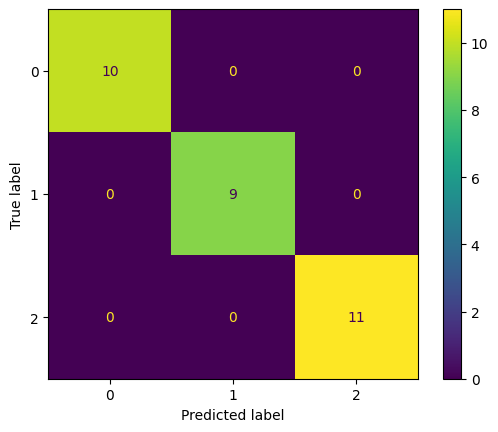

In [14]:
#Ans35
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()


In [15]:
#Ans36:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

estimators = [
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(probability=True)),
]
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)
stack.fit(X_train, y_train)
print("Stacking Accuracy:", stack.score(X_test, y_test))


Stacking Accuracy: 1.0


In [ ]:
#Ans37
importances = model.feature_importances_
indices = importances.argsort()[::-1]
for i in range(5):
    print(f"Feature {indices[i]}: Importance = {importances[indices[i]]:.4f}")

In [ ]:
#Ans38
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = bag.predict(X_test)
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))


In [18]:
#Ans39
for depth in [None, 5, 10, 20]:
    rf = RandomForestClassifier(max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    acc = rf.score(X_test, y_test)
    print(f"Max Depth: {depth}, Accuracy: {acc:.4f}")


Max Depth: None, Accuracy: 1.0000
Max Depth: 5, Accuracy: 1.0000
Max Depth: 10, Accuracy: 1.0000
Max Depth: 20, Accuracy: 1.0000


In [ ]:
#Ans40
from sklearn.neighbors import KNeighborsRegressor

models = {
    'Decision Tree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor()
}

for name, base in models.items():
    bag = BaggingRegressor(base_estimator=base, n_estimators=50, random_state=42)
    bag.fit(X_train, y_train)
    y_pred = bag.predict(X_test)
    print(f"{name} Base - MSE: {mean_squared_error(y_test, y_pred):.4f}")

In [ ]:
#Ans41
from sklearn.metrics import roc_auc_score

probs = model.predict_proba(X_test)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, probs))


In [ ]:
#Ans42
from sklearn.model_selection import cross_val_score

scores = cross_val_score(bag, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", scores.mean())

In [ ]:
#Ans43
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

probs = model.predict_proba(X_test)[:, 1]
prec, rec, _ = precision_recall_curve(y_test, probs)
disp = PrecisionRecallDisplay(precision=prec, recall=rec)
disp.plot()


In [23]:
#Ans44
stack = StackingClassifier(
    estimators=[('rf', RandomForestClassifier()), ('log', LogisticRegression())],
    final_estimator=LogisticRegression()
)
stack.fit(X_train, y_train)
print("Stacking Accuracy:", stack.score(X_test, y_test))


Stacking Accuracy: 1.0


In [ ]:
#Ans45
for max_samples in [0.5, 0.7, 1.0]:
    model = BaggingRegressor(n_estimators=50, max_samples=max_samples, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Bootstrap Sample {max_samples*100:.0f}%, MSE: {mse:.4f}")